In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tkinter import filedialog,Text
from PIL import Image, ImageOps
import tkinter as tk
import io
import cv2

In [29]:
labels = pd.read_csv('labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [30]:
train_file_location = 'train/' 
train_data = labels.assign(img_path = lambda x : train_file_location + x['id'] + '.jpg')
train_data.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                     img_path  
0  train/000bec180eb18c7604dcecc8fe0dba07.jpg  
1  train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  train/001cdf01b096e06d78e9e5112d419397.jpg  
3  train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  train/0021f9ceb3235effd7fcde7f7538ed62.jpg

# Data Quality

## Image visualization

boston_bull


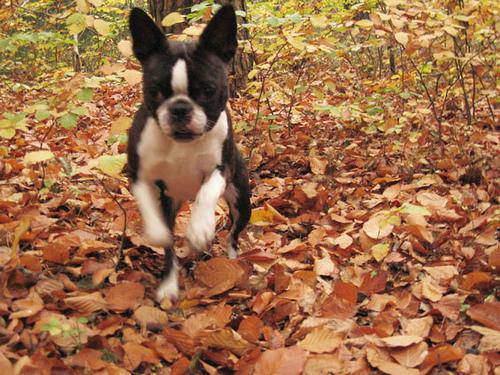

In [31]:
from IPython.display import Image
print(train_data['breed'][0])
Image(train_data['img_path'][0])

dingo


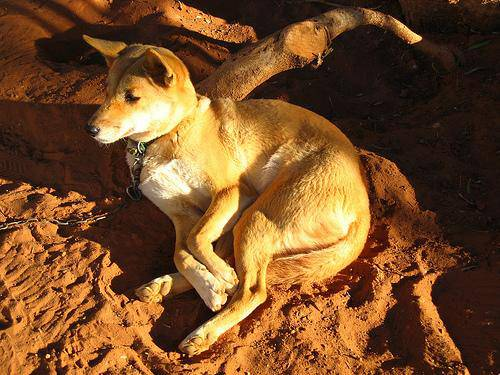

In [32]:
print(train_data['breed'][1])
Image(train_data['img_path'][1])

irish_setter


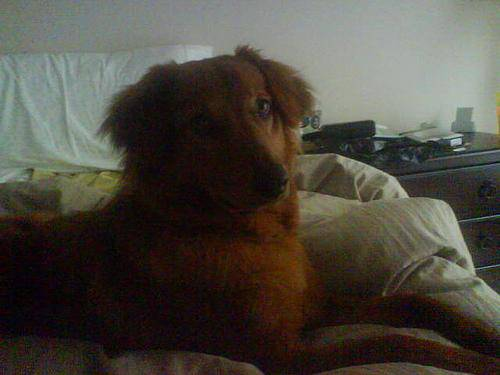

In [33]:
print(train_data['breed'][1000])
Image(train_data['img_path'][1000])

<AxesSubplot:>

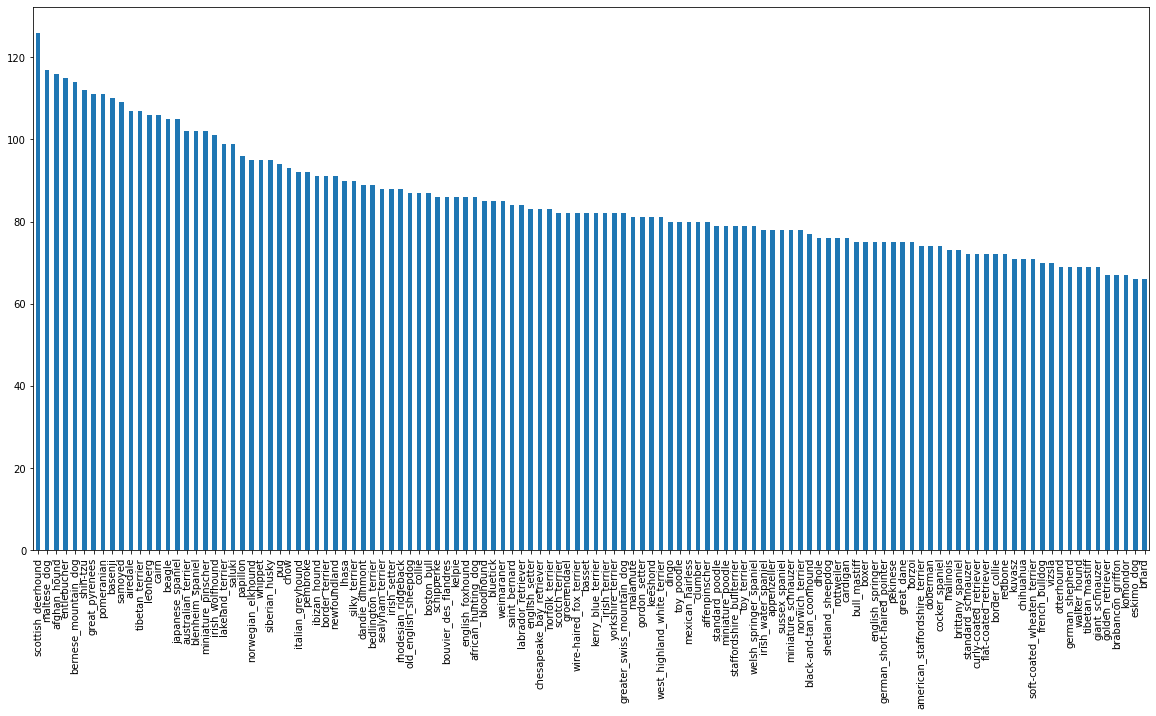

In [34]:
train_data["breed"].value_counts().plot.bar(figsize = (20, 10))

In [35]:
from PIL import Image
size=[]
for i in train_data['img_path']:
    img = Image.open(i)
    size.append(img.size)

In [10]:
size[:10]

[(500, 375),
 (500, 375),
 (500, 375),
 (400, 344),
 (500, 500),
 (500, 375),
 (500, 470),
 (231, 227),
 (474, 500),
 (500, 332)]

Irregular shapes of images

In [10]:
def resize(im,new_height,new_width):
    resized_image=im.resize((new_width,new_height))
    return resized_image

In [12]:
files = os.listdir('train')

In [13]:
for file in files:
    im = Image.open("train/"+file)
    im_resized=resize(im,128,128)
    filepath = f"new-train/{file}"
    im_resized.save(filepath)

In [11]:
new_train_file = 'new-train/' 
new_train_data = labels.assign(img_path = lambda x : new_train_file + x['id'] + '.jpg')
new_train_data.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                         img_path  
0  new-train/000bec180eb18c7604dcecc8fe0dba07.jpg  
1  new-train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
2  new-train/001cdf01b096e06d78e9e5112d419397.jpg  
3  new-train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
4  new-train/0021f9ceb3235effd7fcde7f7538ed62.jpg

In [12]:
from PIL import Image
size=[]
for i in new_train_data['img_path']:
    img = Image.open(i)
    size.append(img.size)

In [13]:
size[:10]

[(128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (128, 128)]

# Feature Extraction

# Feature Detection using ORB

In [36]:
orb = cv2.ORB_create(40)

In [37]:
img = cv2.imread(train_data['img_path'][2])

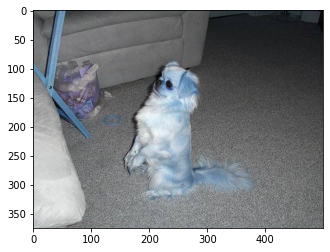

In [38]:
plt.imshow(img)

In [39]:
kp, des = orb.detectAndCompute(img, None)

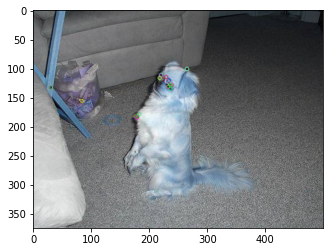

In [40]:
img = cv2.drawKeypoints(img,kp,None,flags=0)
plt.imshow(img)

In [41]:
data=pd.DataFrame()

In [42]:
for i in range(len(new_train_data['img_path'])):
    img = cv2.imread(new_train_data['img_path'][i])
    img = img.flatten()
    data[i]=pd.DataFrame(img)

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[i]=pd.DataFrame(img)
C:\Users\YASHKUMAR JAIN\AppData\Local\Temp\ipykernel_23548\1044618420.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

In [43]:
data = data.T

In [44]:
data

0      1      2      3      4      5      6      7      8      9      \
0         55    105    158     75    128    179     82    136    183     60   
1         35     38     66     29     38     65     24     41     68     21   
2        109    105    116    106    105    114    104    109    112    105   
3         77     83     78     97    103     98     50     55     53     39   
4         82     84     84     81     83     83     79     81     81     77   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10217    202    200    199    202    200    199    201    199    198    202   
10218    161    159    165    159    157    163    158    156    162    160   
10219      1      1      1      1      1      1      1      1      1      1   
10220    165    165    171    165    165    171    165    165    171    166   
10221    186    186    186    187    187    187    175    175    175    198   

       ...  49142  49143  49144  49145  49146  49147  49148  49149  49150  \
0      ...    198     15     59    113     39     80    135    103    145   
1      ...     54     26     31     56      0     22     52      0     38   
2      ...    119    114    116    116    111    113    113    110    112   
3      ...    120     83    101    112     82    100    111     78     96   
4      ...     87     84     86     86     86     88     88     91     93   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10217  ...    170    171    174    172    172    175    173    172    175   
10218  ...    172    176    171    173    180    175    177    183    178   
10219  ...    167    179    174    171    190    185    182    202    197   
10220  ...    135    154    139    137    157    139    138    158    140   
10221  ...    209    206    206    206    205    205    205    204    204   

       49151  
0        198  
1         68  
2        112  
3        107  
4         93  
...      ...  
10217    173  
10218    180  
10219    194  
10220    139  
10221    204  

[10222 rows x 49152 columns]

In [45]:
data=data.fillna(0)

In [46]:
labels = new_train_data['breed']

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_data=StandardScaler().fit_transform(data)

In [48]:
pca =PCA(0.95)

In [ ]:
train_data=pca.fit_transform(std_data)

In [ ]:
import plotly.express as px
explained_variance_ratio=[r for r in np.cumsum(pca.explained_variance_ratio_) if r<=1]
px.area(x=range(1,len(explained_variance_ratio)+1),
       y=explained_variance_ratio,
       labels={"x":"# Components","y":"Variance ratio"})

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.33,random_state=42)

In [ ]:
from sklearn.svm import SVC

poly6 = SVC(C=2, kernel='poly', degree=3, gamma='auto', random_state=42)
poly6.fit(X_train, Y_train)